# Подготовка данных

In [1]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import torch
import os

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)


In [2]:
# df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

/var/folders/2x/tx689lxn54ngmttr2b89rvg00000gn/T/ipykernel_19073/3738330455.py:2: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')


In [3]:
# import pandas as pd
# import os

# # Create logs directory if it doesn't exist
# os.makedirs('logs', exist_ok=True)

# # Load the dataframes
# df1 = pd.read_csv("InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
# df2 = pd.read_csv("InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

# # Get columns for each dataframe
# cols_df1 = set(df1.columns)
# cols_df2 = set(df2.columns)

# # Find the differences
# cols_only_in_df1 = cols_df1 - cols_df2
# cols_only_in_df2 = cols_df2 - cols_df1

# # Write results to log file
# with open('logs/column_comparison_2025-04-21.txt', 'w') as f:
#     f.write("Columns only in df1 (2023-10-30):\n")
#     for col in sorted(cols_only_in_df1):
#         f.write(f"- {col}\n")
    
#     f.write("\nColumns only in df2 (2025-04-20):\n")
#     for col in sorted(cols_only_in_df2):
#         f.write(f"- {col}\n")
    
#     f.write("\nTotal differences:\n")
#     f.write(f"- {len(cols_only_in_df1)} columns unique to df1\n")
#     f.write(f"- {len(cols_only_in_df2)} columns unique to df2\n")
    
# # Also print to console
# print("Columns only in df1 (2023-10-30):")
# for col in sorted(cols_only_in_df1):
#     print(f"- {col}")

# print("\nColumns only in df2 (2025-04-20):")
# for col in sorted(cols_only_in_df2):
#     print(f"- {col}")

# print("\nTotal differences:")
# print(f"- {len(cols_only_in_df1)} columns unique to df1")
# print(f"- {len(cols_only_in_df2)} columns unique to df2")

In [4]:
df = df.dropna(subset=['sex'])
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [6]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

intervention_cols = ['single_vessel', 'trifurcation', 'bifurcation_location', 
                  'lesion_ivolves', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'cto_bifurc', 
                  'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

new_cols = ['adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan',
            'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation',
            'currently_on_dialysis', 'followup_1_year_do_not_complete_if_2nd_bifurcation_complete',
            'identifier', 'ishemia_test___1', 'ishemia_test___2', 'ishemia_test___3', 'ishemia_test___4',
            'kissing_post_2stent___1', 'kissing_post_2stent___2', 'left_main_stent_direction',
            'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia',
            'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2',
            'other_lesions_in_main_bran', 'other_lesions_in_side_brach',
            'patient_information_do_not_complete_if_2nd_bifurca_complete', 'pot_2', 'pot_balloon_diametr_2',
            'pot_balloon_length', 'pot_balloon_length_2', 'pressure2', 'reson_for_change_stopped___1',
            'reson_for_change_stopped___2', 'reson_for_change_stopped___3', 'restenosis_f5', 'sb_length_2',
            'sb_stenosis_f2', 'side_branch_calcification_2', 'side_branch_restenosis',
            'side_branch_restenosis_3', 'side_branch_restenosis_5', 'stent_pressure', 'stent_type_2___1',
            'stent_type_2___2', 'stent_type_2___3', 'stent_type_2___4', 'stent_type_2___5', 'stent_type_2___6',
            'stent_type_2___7', 'stent_type_2___8', 'stent_type_2___9', 'thrombolysis', 'uncross_strategy___1',
            'uncross_strategy___2', 'uncross_strategy___3', 'uncross_strategy___4', 'uncross_strategy___5',
            'uncross_strategy___6', 'uncross_strategy___7', 'uncross_strategy___8', 'uncross_strategy___9']

In [7]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [8]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [9]:
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
patient_present_cols = patient_info_cols + intervention_cols + operation_cols + new_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [11]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,clinical_presentation,time_from_mi_symptoms_onse,ccs_class,...,thrombolysis,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,5.0,4.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,NaN,1.0,...,NaN,0,0,0,0,0,0,0,0,0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,4.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,2.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,NaN,2.0,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,3.0,1.0,NaN,...,1.0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,3.0,1.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [12]:
columns_to_preserve = ['valvular_disease', 'previous_stroke_tia', 'twostent_technique']

def remove_columns_with_nan_threshold(df, threshold=250):
    nan_counts = df.isnull().sum()
    
    columns_to_drop = [col for col in nan_counts[nan_counts > threshold].index 
                      if col not in columns_to_preserve]
    
    print(columns_to_drop)
    
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

In [13]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

['time_from_mi_symptoms_onse', 'ccs_class', 'insulin_diabetes', 'valvular_disease_was_previ', 'previously_treated_cerebro', 'previously_treated_periphe', 'lesion_ivolves', 'total_trobotic_occlusion', 'sb_length', 'timi_flow_main_branch', 'timi_flow_side_branch', 'stent_was_implated_from_lm', 'first_stent_impanted', 'provisional_2_stent_techni', 'dstent2', 'stent_length2', 'sb_stent_side_branch_diametr', 'proximal_optimization', 'pot', 'pot_balloon_diametr', 'several_kissing', 'adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan', 'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation', 'left_main_stent_direction', 'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia', 'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2', 'other_lesions_in_main_bran', 'other_lesions_in_side_brach', 'pot_2', 'pot_balloon_diametr_2', 'pot_balloon_length', 'pot_balloon_length_2', 'pressure2

In [14]:
# patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df = patient_present_df.drop(['date'], axis = 1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___9,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [16]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [18]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

158
2044


In [19]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [20]:
unique, counts = np.unique(combined_adverse_events, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1886, 1: 53, 2: 18, 3: 51, 4: 36}


In [21]:
id_col = patient_present_df['record_id']
patient_present_df = patient_present_df.drop(['record_id', 'identifier'], axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [23]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical + binary] = imputer_categorical.fit_transform(X_train[categorical + binary])
X_test[categorical + binary] = imputer_categorical.transform(X_test[categorical + binary])
X_val[categorical + binary] = imputer_categorical.transform(X_val[categorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,dyslipidemia,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,1.0,41.0,0.0,100.000000,177.000000,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,1.0,81.000000,172.000000,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,55.0,1.0,87.535524,172.093993,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,79.0,0.0,61.000000,160.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,1.0,84.000000,179.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2.0,69.0,0.0,111.000000,159.000000,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1.0,57.0,0.0,96.000000,178.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,1.0,63.0,0.0,80.000000,162.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,75.0,0.0,165.000000,71.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False)
# df_for_ohe = pd.concat([X_train[cathegorical], X_test[cathegorical], X_val[cathegorical]], ignore_index=True)
# ohe.fit(df_for_ohe)

In [26]:
# def process_ohe(dataframe, cat_cols, encoder):
#     encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

#     encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

#     dataframe = pd.concat([dataframe, encoded_columns], axis=1)

#     dataframe.drop(cat_cols, axis=1, inplace=True)

#     return dataframe

In [27]:
# X_train = process_ohe(X_train, cathegorical, ohe)
# X_test = process_ohe(X_test, cathegorical, ohe)
# X_val = process_ohe(X_val, cathegorical, ohe)
# X_train

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [84] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [29]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,adhoc_pci,previous_pci,cto_bifurc,valvular_disease,side_diametr,major_lm,mi_history,trifurcation,dyslipidemia,smoking
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.4,0.0,1.0,0.0,0.0,0.0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,1.0,1.0,0.0,0.000000,3.0,0.0,1.0,0.0,0.0,0.0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,1.0,0.0,0.0,0.000000,2.4,0.0,0.0,0.0,1.0,0.0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,3.1,0.0,0.0,0.0,0.0,0.0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,2.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,69.608441,0.0,0.0,97.0,1.0,0.0,...,0.0,1.0,0.0,-0.048430,2.7,0.0,0.0,0.0,0.0,0.0
1222,57.0,0.0,39.0,0.0,53.707072,0.0,0.0,127.0,0.0,0.0,...,0.0,0.0,0.0,0.005881,2.4,0.0,0.0,1.0,0.0,0.0
1223,63.0,1.0,71.0,0.0,86.111321,0.0,0.0,83.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,2.2,0.0,0.0,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,68.979615,1.0,0.0,93.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,2.4,0.0,0.0,0.0,1.0,1.0


In [30]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease', 'ckd',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'creatinine',
       'single_vessel', 'calcium', 'stent_type___3', 'medina_side',
       'atrial_fibrilation', 'height', 'def', 'history_of_cancer',
       'side_stenosis', 'previous_stroke_tia', 'minor_criteria',
       'clinical_presentation', 'adhoc_pci', 'previous_pci', 'cto_bifurc',
       'valvular_disease', 'side_diametr', 'major_lm', 'mi_history',
       'trifurcation', 'dyslipidemia', 'smoking'],
      dtype='object')

In [31]:
columns_to_preserve

['valvular_disease', 'previous_stroke_tia', 'twostent_technique']

In [32]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['ckd',
 'creatinine',
 'side_stenosis',
 'minor_criteria',
 'adhoc_pci',
 'valvular_disease',
 'major_lm',
 'mi_history']

In [33]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0
1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0
1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0


In [34]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'previous_stroke_tia',
       'clinical_presentation', 'previous_pci', 'cto_bifurc', 'side_diametr',
       'trifurcation', 'dyslipidemia', 'smoking'],
      dtype='object')

In [35]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(1226, 22)
(409, 22)
(409, 22)
(1226,)


In [36]:
print(X_train.columns)

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'previous_stroke_tia',
       'clinical_presentation', 'previous_pci', 'cto_bifurc', 'side_diametr',
       'trifurcation', 'dyslipidemia', 'smoking'],
      dtype='object')


In [37]:
X_test['height']

0      150.0
1      164.0
2      176.0
3      174.0
4      164.0
       ...  
404    172.0
405    160.0
406    177.0
407    153.0
408    168.0
Name: height, Length: 409, dtype: float64

# edge case

In [38]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=150)
edge_cases


,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,restenosis_reocclusion,adhoc_pci,main_predilatation,stent_diameter,stent_length,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation
0,90.618102,167.247977,4,26.657204,1,0,1,1,1,1,...,1,1,1,2.341073,29.412235,1,1,1,1,1
1,99.260715,147.186857,5,23.376064,1,1,0,1,0,1,...,1,1,1,2.506090,33.708774,1,1,1,1,1
2,95.979909,144.346846,5,21.363330,1,1,0,1,0,1,...,1,1,1,2.508149,29.852704,1,1,1,1,1
3,93.979877,154.683583,5,28.595316,0,1,1,1,1,1,...,1,1,1,2.279842,30.786431,1,1,1,1,1
4,87.340280,169.569514,5,16.667962,1,0,1,1,1,1,...,1,1,0,2.706269,30.187098,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,85.553304,155.667298,5,22.109425,1,1,1,1,1,1,...,1,0,1,2.483559,30.124473,1,1,1,1,1
146,94.143465,163.099807,5,25.013366,1,1,1,1,1,1,...,1,1,1,2.172370,34.635236,1,1,0,1,1
147,92.540185,146.474631,5,17.584798,1,1,0,1,1,1,...,1,0,1,2.414497,32.111975,1,1,1,1,1
148,85.772181,158.686714,5,17.884335,1,0,1,1,1,1,...,1,1,1,2.279130,32.024063,1,1,1,1,1


In [39]:
edge_cases.columns

Index(['age', 'height', 'clinical_presentation', 'ef',
       'cerebrovascular_disease', 'peripheral_artery_disease',
       'if_yes_what_type___1', 'single_vessel', 'calcium', 'medina_side',
       'trifurcation', 'cto_bifurc', 'def', 'history_of_cancer',
       'previous_pci', 'previous_stroke_tia', 'side_diametr', 'stent_type___3',
       'stent_type___4', 'stent_type___5', 'restenosis_reocclusion',
       'adhoc_pci', 'main_predilatation', 'stent_diameter', 'stent_length',
       'mortality', 'smoking', 'dyslipidemia', 'anemia', 'atrial_fibrilation'],
      dtype='object')

In [40]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 30
Total columns in X_train: 22
Number of common columns: 22

--- COMMON COLUMNS ---
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- clinical_presentation
- cto_bifurc
- def
- dyslipidemia
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- medina_side
- peripheral_artery_disease
- previous_pci
- previous_stroke_tia
- side_diametr
- single_vessel
- smoking
- stent_type___3
- trifurcation

--- COLUMNS ONLY IN EDGE CASES ---
- adhoc_pci
- main_predilatation
- mortality
- restenosis_reocclusion
- stent_diameter
- stent_length
- stent_type___4
- stent_type___5

--- COLUMNS ONLY IN X_TRAIN ---


# Syntetic data

In [41]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0


In [42]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0,0


In [43]:
from synthcity.plugins import Plugins

# Print the list of available plugins
print(Plugins().list())

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2025-05-26T16:41:20.591472+0400][19073][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-26T16:41:20.592215+0400][19073][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T16:41:20.592453+0400][19073][CRITICAL] module plugin_great load failed
[2025-05-26T16:41:20.696704+0400][19073][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


['survival_ctgan', 'arf', 'timevae', 'bayesian_network', 'survival_gan', 'nflow', 'image_cgan', 'dummy_sampler', 'adsgan', 'decaf', 'marginal_distributions', 'survae', 'ddpm', 'pategan', 'image_adsgan', 'timegan', 'uniform_sampler', 'radialgan', 'survival_nflow', 'rtvae', 'ctgan', 'tvae', 'aim', 'privbayes', 'dpgan', 'fflows']


# Оптимизация CatBoost на auc-roc для 10 фолдов

In [44]:
# X_train_new = pd.concat([X_train, syntetic_minority_dropped])
# X_train_new

In [45]:
# y_train_new = np.concatenate((y_train, syntetic_target))
# y_train_new

In [46]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [47]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [48]:
X_train_folds = pd.concat([X_train, X_val])
y_train_k_fold = np.concatenate((y_train, y_val), axis=0)

In [49]:
scaled_features = scaller.transform(X_train_folds)

In [50]:
train_df = pd.DataFrame(data=scaled_features, columns=X_train_folds.columns)
train_df

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,-2.317888,-0.228824,-0.659638,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,1.297194,-0.708838,...,-0.075779,-0.232745,0.162955,2.292618,1.163257,-0.286501,-0.417415,-0.212564,-0.825685,-0.516264
1,-0.791826,-0.228824,1.121135,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,4.296547,-0.730225,1.534186,1.163257,-0.286501,0.684941,-0.212564,-0.825685,-0.516264
2,-0.893563,-0.228824,1.308584,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,-0.708838,...,-0.075779,-0.232745,0.171210,0.775754,-0.859655,-0.286501,-0.417415,-0.212564,1.211116,-0.516264
3,1.548135,-0.228824,1.589759,2.638378,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,-0.232745,-2.446583,-0.741111,-0.859655,-0.286501,0.868667,-0.212564,-0.825685,-0.516264
4,-0.283139,-0.228824,0.558786,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,-0.770894,-0.708838,...,-0.075779,4.296547,0.007535,0.017321,-0.859655,-0.286501,-0.233689,-0.212564,-0.825685,-0.516264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,-0.690089,-0.228824,0.465061,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,-0.232745,0.080058,-0.741111,1.163257,-0.286501,-0.766494,4.704474,1.211116,-0.516264
1631,1.649873,4.370167,-0.940812,-0.379021,-0.288165,-0.155651,-0.926054,1.932250,1.297194,-0.708838,...,-0.075779,-0.232745,1.474545,2.292618,1.163257,-0.286501,1.971022,-0.212564,-0.825685,-0.516264
1632,0.429023,-0.228824,0.652510,-0.379021,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,4.296547,-0.326126,-0.741111,1.163257,-0.286501,0.133763,-0.212564,-0.825685,-0.516264
1633,-0.283139,-0.228824,0.090161,-0.379021,-0.288165,6.424629,1.079851,1.932250,-0.770894,1.410760,...,-0.075779,-0.232745,-0.335178,0.017321,1.163257,-0.286501,0.133763,-0.212564,-0.825685,-0.516264


In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
from catboost import CatBoostClassifier
import json
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['iterations'] = int(params['iterations'])
    params['depth'] = int(params['depth'])
    params['border_count'] = int(params['border_count'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        not_scaled_X_train_folds = X_train_folds.copy()
        scaled_X_train_folds = scaller.transform(not_scaled_X_train_folds)
        X_test = scaled_X_train_folds[test_index]
        y_test = y_train_k_fold[test_index]

        # Prepare train data with target
        train_df = not_scaled_X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        train_df['target'] = y_train_k_fold[train_index]
        
        # Create GenericDataLoader as per documentation
        loader = GenericDataLoader(
            train_df,
            target_column="target",
        )
        
        # Generate synthetic data using synthcity
        syn_model = Plugins().get("arf")
        syn_model.fit(loader)
        
        # Generate synthetic samples
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority class samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        
        # Drop target column from synthetic data
        syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        syntetic_target = minority_synthetic_data['target']

        # Combine original and synthetic data
        X_train = pd.concat([not_scaled_X_train_folds.iloc[train_index], syntetic_minority_features])
        X_train = scaller.transform(X_train)
        y_train = np.concatenate((y_train_k_fold[train_index], syntetic_target.values), axis=0)
        
        # Initialize classifier with current parameters
        classifier = CatBoostClassifier(
            iterations=params['iterations'],
            depth=params['depth'],
            learning_rate=params['learning_rate'],
            l2_leaf_reg=params['l2_leaf_reg'],
            border_count=params['border_count'],
            verbose=0
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space (small range for essential params)
space = {
    'iterations': hp.quniform('iterations', 100, 500, 100),  # 100, 200, 300, 400, 500
    'depth': hp.choice('depth', [4, 6, 8]),                 # Small range of depths
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.1)),  # Log-uniform between 0.01 and 0.1
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 5),         # Regularization parameter
    'border_count': hp.quniform('border_count', 32, 128, 32)  # 32, 64, 96, 128
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,  # Limit to 10 evaluations for efficiency
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    verbose=0
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf")
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
best_model.save_model('new_scores_CatBoost_arf_keep_below_threshold.cbm')

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'iterations': int(best_params['iterations']),
        'depth': int(best_params['depth']),
        'learning_rate': float(best_params['learning_rate']),
        'l2_leaf_reg': float(best_params['l2_leaf_reg']),
        'border_count': int(best_params['border_count'])
    },
    'evaluation_metrics': best_metrics
}

with open('new_scores_CatBoost_arf_keep_below_threshold.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

In [45]:
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    verbose=0
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf")
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=3000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 200:
    minority_synthetic_data = minority_synthetic_data.sample(n=200)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
best_model.save_model('scores_CatBoost_synthetic_arf.cbm')

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'iterations': int(best_params['iterations']),
        'depth': int(best_params['depth']),
        'learning_rate': float(best_params['learning_rate']),
        'l2_leaf_reg': float(best_params['l2_leaf_reg']),
        'border_count': int(best_params['border_count'])
    },
    'evaluation_metrics': best_metrics
}

with open('scores_CatBoost_synthetic_arf.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-04-30T13:40:03.488874+0400][98152][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-04-30T13:40:03.488874+0400][98152][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.6159021406727829
Iteration number 1 reached accuracy of 0.44036697247706424.


[2025-04-30T13:40:10.295399+0400][98152][INFO] [ef] quality loss for constraints le = 82.0. Remaining 2992. prev length 3000. Original dtype float64.
[2025-04-30T13:40:10.295990+0400][98152][INFO] [ef] quality loss for constraints ge = 17.0. Remaining 2989. prev length 2992. Original dtype float64.
[2025-04-30T13:40:10.296850+0400][98152][INFO] [age] quality loss for constraints le = 97.0. Remaining 2983. prev length 2989. Original dtype float64.
[2025-04-30T13:40:10.297505+0400][98152][INFO] [age] quality loss for constraints ge = 28.0. Remaining 2981. prev length 2983. Original dtype float64.
[2025-04-30T13:40:10.298824+0400][98152][INFO] [previous_stroke_tia] quality loss for constraints le = 1.541114238227274. Remaining 2976. prev length 2981. Original dtype float64.
[2025-04-30T13:40:10.299528+0400][98152][INFO] [previous_stroke_tia] quality loss for constraints ge = 0.0. Remaining 2941. prev length 2976. Original dtype float64.
[2025-04-30T13:40:10.300971+0400][98152][INFO] [heig

Best parameters, model, and evaluation metrics saved.


Test Set Evaluation Metrics:
ROC AUC: 0.7679
F1 Score: 0.1143
Precision: 0.5000
Recall: 0.0645
Accuracy: 0.9242
Test metrics added to scores_CatBoost_synthetic_arf.json


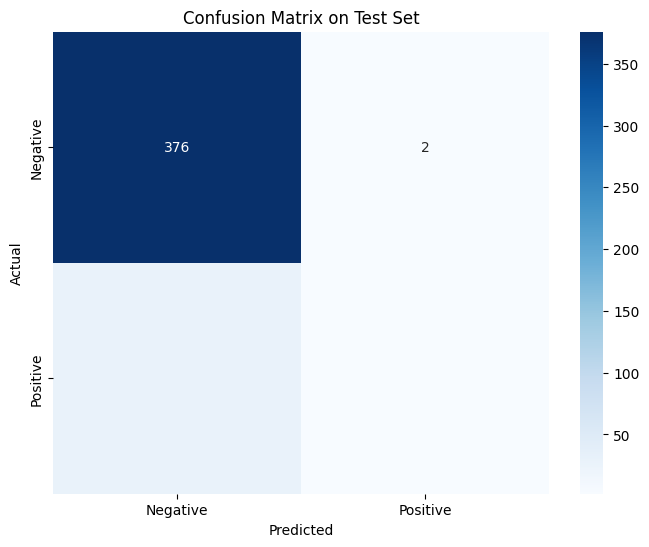

In [46]:
# Load necessary libraries
import numpy as np
import pandas as pd
import json
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from catboost import CatBoostClassifier

# Assuming X_test and y_test are already available from your previous splits
# and scaller has been previously defined and fitted

# Scale the test data using the same scaler
X_test_scaled = scaller.transform(X_test)

# Make predictions
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_metrics = {
    'roc_auc': roc_auc_score(y_test, y_pred_proba),
    'f1': f1_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred)
}

# Print the test metrics
print("Test Set Evaluation Metrics:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Optionally, you can save these metrics to a file
test_evaluation = {
    'test_metrics': test_metrics
}

# Append test metrics to your existing results file
try:
    with open('scores_CatBoost_synthetic_arf.json', 'r') as f:
        existing_data = json.load(f)
    
    existing_data['test_evaluation'] = test_metrics
    
    with open('scores_CatBoost_synthetic_arf.json', 'w') as f:
        json.dump(existing_data, f, indent=4)
    
    print("Test metrics added to scores_CatBoost_synthetic_arf.json")
except Exception as e:
    print(f"Error updating metrics file: {e}")
    print("Test metrics were not saved to file")

# You can also generate a confusion matrix for visual analysis
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')
plt.show()

# CATBOOST + GAN

In [51]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0


In [52]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0,0


In [53]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=X_train_with_ID_and_target)

In [58]:
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import json
# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

In [55]:
best_params = {
  "iterations": 400,
  "depth": 8,
  "learning_rate": 0.01780769004704398,
  "l2_leaf_reg": 4.6744281551879405,
  "border_count": 64
}

In [64]:
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    random_state=RANDOM_SEED,
    verbose=0
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("ctgan", n_iter=100, random_state=RANDOM_SEED)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
best_model.save_model('model_CatBoost_ctgan.cbm')

X_test_scaled = scaller.transform(X_test)

# Make predictions
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_labels = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_labels, zero_division=0)
test_precision = precision_score(y_test, test_pred_labels, zero_division=0)
test_recall = recall_score(y_test, test_pred_labels, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_labels)

# Create dictionary for test metrics
test_metrics = {
    'test_roc_auc': float(test_roc_auc),
    'test_f1': float(test_f1),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_accuracy': float(test_accuracy)
}

# Print the metrics
print("Test Metrics:")
for metric_name, metric_value in test_metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Save the model and metrics
from joblib import dump
model_filename = 'model_test_CatBoost_ctgan.joblib'
dump(best_model, model_filename)

# Save the test metrics to a file
metrics_and_params = {
    'best_parameters': best_params,
    'test_metrics': test_metrics
}

with open('test_scores_CatBoost_ctgan.json', 'w') as f:
    json.dump(metrics_and_params, f, indent=4)


[2025-05-26T16:56:02.499957+0400][19073][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T16:56:02.500749+0400][19073][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T16:56:02.501273+0400][19073][CRITICAL] module plugin_great load failed
[2025-05-26T16:56:02.501793+0400][19073][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 100/100 [00:22<00:00,  4.35it/s]


Test Metrics:
test_roc_auc: 0.6833
test_f1: 0.0476
test_precision: 0.0909
test_recall: 0.0323
test_accuracy: 0.9022


# CATBOOST + ARF

In [80]:
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    random_state=RANDOM_SEED,
    verbose=0
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf", random_state=RANDOM_SEED)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
best_model.save_model('model_CatBoost_arf.cbm')

X_test_scaled = scaller.transform(X_test)

# Make predictions
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_labels = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_labels, zero_division=0)
test_precision = precision_score(y_test, test_pred_labels, zero_division=0)
test_recall = recall_score(y_test, test_pred_labels, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_labels)

# Create dictionary for test metrics
test_metrics = {
    'test_roc_auc': float(test_roc_auc),
    'test_f1': float(test_f1),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_accuracy': float(test_accuracy)
}

# Print the metrics
print("Test Metrics:")
for metric_name, metric_value in test_metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Save the model and metrics
from joblib import dump
model_filename = 'model_test_CatBoost_arf.joblib'
dump(best_model, model_filename)

# Save the test metrics to a file
metrics_and_params = {
    'best_parameters': best_params,
    'test_metrics': test_metrics
}

with open('test_scores_CatBoost_arf.json', 'w') as f:
    json.dump(metrics_and_params, f, indent=4)


[2025-05-26T17:25:19.475466+0400][19073][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:25:19.476285+0400][19073][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:25:19.476781+0400][19073][CRITICAL] module plugin_great load failed
[2025-05-26T17:25:19.477396+0400][19073][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.6107033639143731
Iteration number 1 reached accuracy of 0.42415902140672784.
Test Metrics:
test_roc_auc: 0.7548
test_f1: 0.2264
test_precision: 0.2727
test_recall: 0.1935
test_accuracy: 0.8998


In [ ]:
Test Metrics:
test_roc_auc: 0.7548
test_f1: 0.2264
test_precision: 0.2727
test_recall: 0.1935
test_accuracy: 0.8998

# CATBOOST + TVAE

In [73]:
best_params = {
  "iterations": 400,
  "depth": 8,
  "learning_rate": 0.01780769004704398,
  "l2_leaf_reg": 4.6744281551879405,
  "border_count": 64
}

In [75]:
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    random_state=RANDOM_SEED,
    verbose=0
)

if not isinstance(X_train_folds, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_folds)
else:
    X_train_df = X_train_folds.copy()

# Add target column to the training data
X_train_df['target'] = y_train_k_fold
X_train_df['index'] = np.arange(1, len(X_train_df) + 1)

# Generate synthetic data using TVAE
synthesizer = TVAESynthesizer(metadata, epochs=500)
synthesizer.fit(X_train_df)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Extract features and target from synthetic data
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_df.drop(['target', 'index'], axis=1), syntetic_minority_dropped])
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Scale the combined training data
X_train_combined_scaled = scaller.fit_transform(X_train_combined)

# Fit final model
best_model.fit(X_train_combined_scaled, y_train_combined)

# Save the best model
best_model.save_model('model_CatBoost_TVAE.cbm')

X_test_scaled = scaller.transform(X_test)

# Make predictions
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_labels = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_labels, zero_division=0)
test_precision = precision_score(y_test, test_pred_labels, zero_division=0)
test_recall = recall_score(y_test, test_pred_labels, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_labels)

# Create dictionary for test metrics
test_metrics = {
    'test_roc_auc': float(test_roc_auc),
    'test_f1': float(test_f1),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_accuracy': float(test_accuracy)
}

# Print the metrics
print("Test Metrics:")
for metric_name, metric_value in test_metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Save the test metrics to a file
metrics_and_params = {
    'best_parameters': best_params,
    'test_metrics': test_metrics
}

with open('test_scores_CatBoost_TVAE.json', 'w') as f:
    json.dump(metrics_and_params, f, indent=4)


Test Metrics:
test_roc_auc: 0.7395
test_f1: 0.1111
test_precision: 0.4000
test_recall: 0.0645
test_accuracy: 0.9218


# CATBOOST + GAUSSIAN COPULA

In [79]:
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    random_state=RANDOM_SEED,
    verbose=0
)

if not isinstance(X_train_folds, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_folds)
else:
    X_train_df = X_train_folds.copy()

# Add target column to the training data
X_train_df['target'] = y_train_k_fold
X_train_df['index'] = np.arange(1, len(X_train_df) + 1)

# Generate synthetic data using Gaussian Copula
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(X_train_df)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Extract features and target from synthetic data
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_df.drop(['target', 'index'], axis=1), syntetic_minority_dropped])
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Scale the combined training data
X_train_combined_scaled = scaller.fit_transform(X_train_combined)

# Fit final model
best_model.fit(X_train_combined_scaled, y_train_combined)

# Save the best model
best_model.save_model('model_CatBoost_GaussianCopula.cbm')

X_test_scaled = scaller.transform(X_test)

# Make predictions
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_labels = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_labels, zero_division=0)
test_precision = precision_score(y_test, test_pred_labels, zero_division=0)
test_recall = recall_score(y_test, test_pred_labels, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_labels)

# Create dictionary for test metrics
test_metrics = {
    'test_roc_auc': float(test_roc_auc),
    'test_f1': float(test_f1),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_accuracy': float(test_accuracy)
}

# Print the metrics
print("Test Metrics:")
for metric_name, metric_value in test_metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Save the test metrics to a file
metrics_and_params = {
    'best_parameters': best_params,
    'test_metrics': test_metrics
}

with open('test_scores_CatBoost_GaussianCopula.json', 'w') as f:
    json.dump(metrics_and_params, f, indent=4)


Test Metrics:
test_roc_auc: 0.6890
test_f1: 0.1538
test_precision: 0.1905
test_recall: 0.1290
test_accuracy: 0.8924


In [ ]:
Test Metrics:
test_roc_auc: 0.6890
test_f1: 0.1538
test_precision: 0.1905
test_recall: 0.1290
test_accuracy: 0.8924